## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

## Variables

In [2]:
INPUT_DATA = "./data_individual_challenge.csv"

In [3]:
data = pd.read_csv(INPUT_DATA,sep=';')

In [4]:
data

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.62810,633.00000,0.62350,0.62720,NaN,NaN,NaN,NaN
1,2000-01-10,0.62710,629.00000,0.61810,0.61970,NaN,NaN,NaN,NaN
2,2000-01-17,0.62000,0.62250,0.60720,609.00000,NaN,NaN,NaN,NaN
3,2000-01-24,0.60910,0.61271,599.00000,0.60270,NaN,NaN,NaN,NaN
4,2000-01-31,0.60210,0.62670,598.00000,0.61580,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1030,2019-09-30,0.89002,0.89365,0.88333,0.88779,47.151897,0.895761,0.889108,1.564625
1031,2019-10-07,0.89050,0.90183,0.86835,0.86835,37.551961,0.892106,0.888143,1.760791
1032,2019-10-14,0.87443,0.88081,0.85808,0.86451,35.993098,0.888426,0.887044,1.830085
1033,2019-10-21,0.86453,0.86687,0.85770,0.86380,35.698024,0.885143,0.885962,1.776589


+ We have 1035 rows and 9 columns
+ We can see some rows where the low price is bigger than high prices, and that doesn't make sense. For example rows with index 3 and 4. They might be an error
+ The row at index 3 close with 599 and the next week open with 6.021. So it doesn't make sense. It might be an error
+ There are some missing values almost at rsi, ema_fast, ema_slow, and volatility

## Data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1035 non-null   object 
 1   Open        1035 non-null   float64
 2   High        1035 non-null   float64
 3   Low         1035 non-null   float64
 4   Close       1035 non-null   float64
 5   rsi         1021 non-null   float64
 6   ema_fast    1022 non-null   float64
 7   ema_slow    994 non-null    float64
 8   volatility  1021 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.9+ KB


 We are going to convert Date variable to Datetime type

In [6]:
data['Date']= pd.to_datetime(data['Date'])

## Univariate analysis

#### Date

In [7]:
data['Date'].describe()

count                    1035
unique                   1035
top       2017-10-30 00:00:00
freq                        1
first     2000-01-03 00:00:00
last      2019-10-28 00:00:00
Name: Date, dtype: object

+ We have data from 3th January 2000 to 28th October 2019
+ There are no missing values in this variable

#### Open

In [8]:
data['Open'].describe()

count    1035.000000
mean       54.802227
std       193.425540
min         0.578300
25%         0.683300
50%         0.800900
75%         0.874650
max       892.000000
Name: Open, dtype: float64

+ There are no missing values in this variable.
+ We can observe that the maximum value is a strange value because is a huge value. It doesn't seem to be an outlier, it must be an error. We have to analyze how many rows have this kind of data.

In [9]:
data.loc[data['Open']>800,]

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
466,2008-12-08,866.0,0.89890,0.85780,0.8966,70.878240,0.827844,0.795277,3.367277
524,2010-01-18,882.0,0.88320,0.86480,878.0000,45.192626,0.892776,0.885602,2.182794
528,2010-02-15,869.0,0.88140,0.86620,0.8811,47.834751,0.884542,0.883499,2.167962
537,2010-04-19,882.0,884.00000,0.86060,0.8686,41.133004,0.886867,0.885899,2.141572
546,2010-06-21,836.0,0.83780,818.00000,0.8226,32.847578,0.854213,0.871823,2.471975
549,2010-07-12,839.0,0.84610,0.83160,0.8429,42.590696,0.848149,0.867097,2.336525
556,2010-08-30,821.0,0.83460,816.00000,0.8327,42.892272,0.834646,0.855792,2.084030
586,2011-03-28,876.0,885.00000,875.00000,0.8829,62.879852,0.860667,0.856685,1.883093
601,2011-07-11,886.0,0.88890,0.87450,0.8766,50.326461,0.882982,0.870994,2.073257
693,2013-04-15,853.0,0.86351,0.85030,0.8577,58.458606,0.849546,0.833580,1.663375


In [10]:
data.loc[data['Open']>1].shape[0]

76

In [11]:
data.loc[data['Open']>100].shape[0]

76

It seems that all the prices bigger than 1 are multiplied by 1000. So instead of 885.00000 they are 0.88500. If we do so, low prices will be smaller than high prices and there would be less volatily between open, high, low and close values.

In [12]:
data.loc[data['Open']>1,'Open']=data['Open']/1000

In [13]:
data['Open'].describe()

count    1035.000000
mean        0.766462
std         0.099069
min         0.578300
25%         0.679100
50%         0.787900
75%         0.859930
max         0.961400
Name: Open, dtype: float64

(array([1.63930912, 2.37069319, 5.01880792, 2.37069319, 0.83226463,
        2.72377515, 2.87509599, 5.39711002, 2.64811473, 0.22698126]),
 array([0.5783 , 0.61661, 0.65492, 0.69323, 0.73154, 0.76985, 0.80816,
        0.84647, 0.88478, 0.92309, 0.9614 ]),
 <a list of 10 Patch objects>)

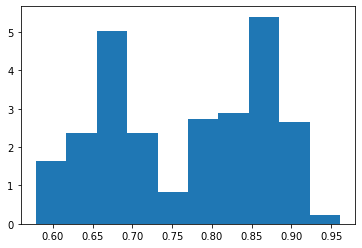

In [14]:
fig,ax = plt.subplots()
ax.hist(data['Open'],density= True)

+ The values are from  0.57 to 0.96
+ The distribution is not normal. Its seems like 2 normal distributions

{'whiskers': [<matplotlib.lines.Line2D at 0x18c55fb8a58>,
 'caps': [<matplotlib.lines.Line2D at 0x18c55fc9198>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c55fb8748>],
 'medians': [<matplotlib.lines.Line2D at 0x18c55fc9898>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c55fc9c18>],
 'means': []}

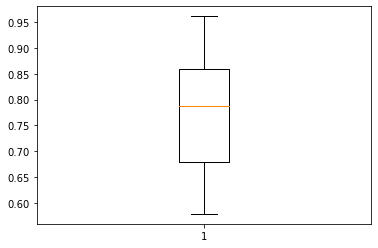

In [15]:
fig,ax = plt.subplots()
ax.boxplot(data['Open'])

+ This distribution doesn't have outliers

#### High

In [16]:
data['High'].describe()

count    1035.000000
mean       62.775776
std       209.802582
min         0.587600
25%         0.688375
50%         0.806430
75%         0.881685
max       934.000000
Name: High, dtype: float64

+ There are no missing values in this variable.
+ It has strange values that we have to correct

In [17]:
data.loc[data['High']>1].shape[0]

86

In [18]:
data.loc[data['High']>100].shape[0]

85

In [19]:
data.loc[(data['High']>1)&(data['High']<=100)]

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
247,2004-09-27,0.68,2.2335,0.6781,0.6895,61.503026,0.675635,0.675357,17.421381


+ There is one row that have 2.2335 for High. It might be Ok because it has a great volatility (17.42), so it's not an error. It would be an outlier. 
+ We are going to see the nearest weeks

In [20]:
data.loc[(data.index >240) & (data.index <255)]

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
241,2004-08-16,0.6712,0.6781,0.6686,0.6766,54.626790,0.667879,0.673614,1.477325
242,2004-08-23,0.6769,0.6781,0.6682,0.6709,50.188942,0.668282,0.673487,1.488859
243,2004-08-30,0.6707,0.6814,0.6699,0.6794,55.937566,0.669764,0.673762,1.486120
244,2004-09-06,0.6793,685.0000,676.0000,0.6828,58.024363,0.671502,0.674183,1.467247
245,2004-09-13,0.6830,0.6853,0.6778,679.0000,54.895151,0.672502,0.674407,1.448966
246,2004-09-20,0.6790,0.6866,0.6785,0.6800,55.574138,0.673502,0.674667,1.428574
247,2004-09-27,0.6800,2.2335,0.6781,0.6895,61.503026,0.675635,0.675357,17.421381
248,2004-10-04,0.6896,0.6924,0.6863,0.6912,62.468289,0.677710,0.676094,16.200247
249,2004-10-11,0.6915,0.6923,685.0000,0.6916,62.705242,0.679562,0.676815,15.109781
250,2004-10-18,0.6916,0.6964,0.6889,0.6953,64.911975,0.681660,0.677675,14.032896


In the week of 2004-09-27 the volatility grew a lot and then it start decreasing. So it is not an error, it is an outlier

In [21]:
data.loc[data['High']>100,'High']=data['High']/1000

In [22]:
data['High'].describe()

count    1035.000000
mean        0.775037
std         0.109941
min         0.587600
25%         0.684500
50%         0.794610
75%         0.867000
max         2.233500
Name: High, dtype: float64

(array([2.73553403, 3.19928336, 0.13501563, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00587024]),
 array([0.5876 , 0.75219, 0.91678, 1.08137, 1.24596, 1.41055, 1.57514,
        1.73973, 1.90432, 2.06891, 2.2335 ]),
 <a list of 10 Patch objects>)

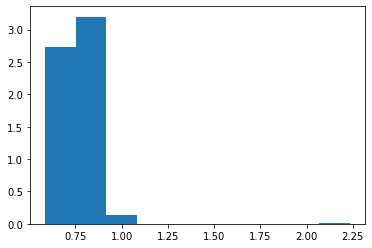

In [23]:
fig,ax = plt.subplots()
ax.hist(data['High'],density= True)

+ This variable has a very different distribution to High
+ It seems to have an outlier in 2.25


{'whiskers': [<matplotlib.lines.Line2D at 0x18c560bc5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x18c560bccc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c560bc2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x18c560c8400>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c560c8780>],
 'means': []}

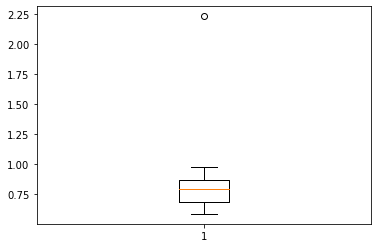

In [24]:
fig,ax = plt.subplots()
ax.boxplot(data['High'])

Let analyze the distribution without that instance

In [25]:
data.loc[data['High']<1,'High'].describe()

count    1034.000000
mean        0.773627
std         0.100187
min         0.587600
25%         0.684450
50%         0.794605
75%         0.866968
max         0.979700
Name: High, dtype: float64

(array([1.97320681, 2.12119732, 5.32765839, 1.92387664, 0.59196204,
        3.05847056, 3.40378175, 5.22899805, 1.67722579, 0.19732068]),
 array([0.5876 , 0.62681, 0.66602, 0.70523, 0.74444, 0.78365, 0.82286,
        0.86207, 0.90128, 0.94049, 0.9797 ]),
 <a list of 10 Patch objects>)

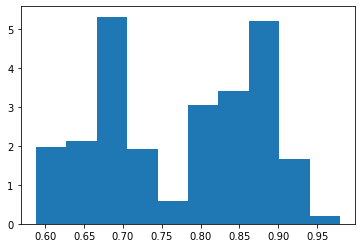

In [26]:
fig,ax = plt.subplots()
ax.hist(data.loc[data['High']<1,'High'],density= True)

+ Without that outlier, the distribution is very similar to the Open variable.

#### Low

In [27]:
data['Low'].describe()

count    1035.000000
mean       76.327544
std       226.985729
min         0.006600
25%         0.678200
50%         0.798400
75%         0.869890
max       899.000000
Name: Low, dtype: float64

+ There are no missing values in this variable.

In [28]:
data.loc[data['Low']>1].shape[0]

105

In [29]:
data.loc[data['Low']>1].shape[0]== data.loc[data['Low']>100].shape[0]

True

In [30]:
data.loc[data['Low']>100,'Low']=data['Low']/1000

In [31]:
data['Low'].describe()

count    1035.000000
mean        0.758744
std         0.101508
min         0.006600
25%         0.674500
50%         0.781000
75%         0.851450
max         0.943800
Name: Low, dtype: float64

(array([0.01030926, 0.        , 0.        , 0.01030926, 0.        ,
        0.01030926, 1.85566628, 3.08246787, 2.93813827, 2.7628809 ]),
 array([0.0066 , 0.10032, 0.19404, 0.28776, 0.38148, 0.4752 , 0.56892,
        0.66264, 0.75636, 0.85008, 0.9438 ]),
 <a list of 10 Patch objects>)

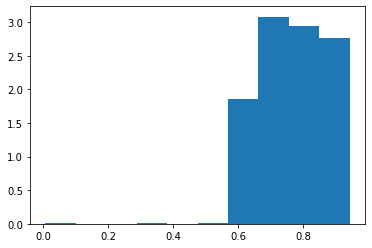

In [32]:
fig,ax = plt.subplots()
ax.hist(data['Low'],density= True)

+ Here we have outliers on the left side of the distribution

{'whiskers': [<matplotlib.lines.Line2D at 0x18c56216128>,
 'caps': [<matplotlib.lines.Line2D at 0x18c56216828>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c56208dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x18c56216f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c562202e8>],
 'means': []}

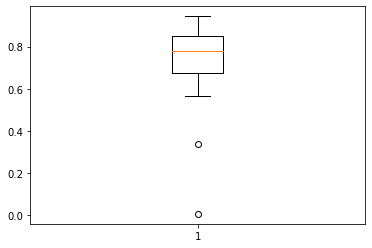

In [33]:
fig,ax = plt.subplots()
ax.boxplot(data['Low'])

In [34]:
data.loc[data['Low']<0.55,'Low']

297    0.3375
428    0.0066
Name: Low, dtype: float64

Lets see the distribution without that outliers

(array([1.05587184, 2.96159176, 3.70842794, 3.68267497, 0.95285996,
        2.31776746, 2.49803827, 4.97032356, 4.14622846, 0.30903566]),
 array([0.5679 , 0.60549, 0.64308, 0.68067, 0.71826, 0.75585, 0.79344,
        0.83103, 0.86862, 0.90621, 0.9438 ]),
 <a list of 10 Patch objects>)

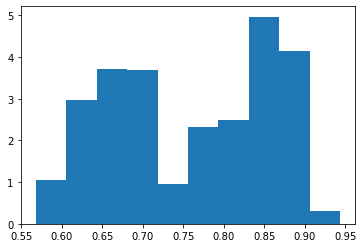

In [35]:
fig,ax = plt.subplots()
ax.hist(data.loc[data['Low']>0.55,'Low'],density= True)

+ It has a similar distribution than the previous variables

#### Close

In [36]:
data.loc[data['Close']>1].shape[0]

80

In [37]:
data.loc[data['Close']>1].shape[0]== data.loc[data['Close']>100].shape[0]

True

In [38]:
data.loc[data['Close']>100,'Close']=data['Close']/1000

In [39]:
data['Close'].describe()

count    1035.000000
mean        0.766788
std         0.099102
min         0.578400
25%         0.679100
50%         0.787800
75%         0.861200
max         0.961600
Name: Close, dtype: float64

(array([1.61366777, 2.37007453, 4.99228465, 2.42050165, 0.80683388,
        2.72306436, 2.89955927, 5.32006092, 2.72306436, 0.22692203]),
 array([0.5784 , 0.61672, 0.65504, 0.69336, 0.73168, 0.77   , 0.80832,
        0.84664, 0.88496, 0.92328, 0.9616 ]),
 <a list of 10 Patch objects>)

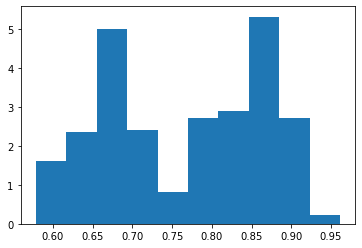

In [40]:
fig,ax = plt.subplots()
ax.hist(data['Close'],density= True)

+ It is very similar to the previous variables

{'whiskers': [<matplotlib.lines.Line2D at 0x18c563db128>,
 'caps': [<matplotlib.lines.Line2D at 0x18c563db828>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c563ccdd8>],
 'medians': [<matplotlib.lines.Line2D at 0x18c563dbf28>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c563e52e8>],
 'means': []}

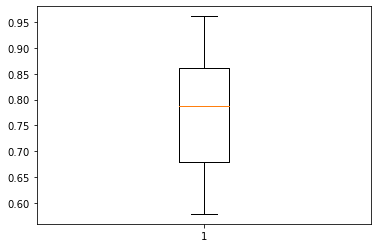

In [41]:
fig,ax = plt.subplots()
ax.boxplot(data['Close'])

This variable doesn't have outliers

+ Open,High,Low and Close variables are simetric but not normal variables.
+ There are some outliers and we have to decide what to do with them

In [42]:
data.loc[(data['High']>1)|(data['Low']<0.5)].shape[0]

3

There are only 3 outliers

In [43]:
print('Percentage of ouliers:{:.2%}'.format(data.loc[(data['High']>1)|(data['Low']<0.5)].shape[0]/data.shape[0]))

Percentage of ouliers:0.29%


We can remove the outliers because they represent only a 0.29% of the dataset

In [44]:
data= data.loc[(data['High']<1)&(data['Low']>0.5)]

In [45]:
data.shape

(1032, 9)

Now we have 1032 rows

#### Validations

In [46]:
data

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.62810,0.63300,0.62350,0.62720,NaN,NaN,NaN,NaN
1,2000-01-10,0.62710,0.62900,0.61810,0.61970,NaN,NaN,NaN,NaN
2,2000-01-17,0.62000,0.62250,0.60720,0.60900,NaN,NaN,NaN,NaN
3,2000-01-24,0.60910,0.61271,0.59900,0.60270,NaN,NaN,NaN,NaN
4,2000-01-31,0.60210,0.62670,0.59800,0.61580,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1030,2019-09-30,0.89002,0.89365,0.88333,0.88779,47.151897,0.895761,0.889108,1.564625
1031,2019-10-07,0.89050,0.90183,0.86835,0.86835,37.551961,0.892106,0.888143,1.760791
1032,2019-10-14,0.87443,0.88081,0.85808,0.86451,35.993098,0.888426,0.887044,1.830085
1033,2019-10-21,0.86453,0.86687,0.85770,0.86380,35.698024,0.885143,0.885962,1.776589


#### Are Low values lower than High values?

In [47]:
data.loc[data['Low']>data['High']].shape[0]

0

Now there no rows where Low values are higher than High values

#### rsi

In [48]:
data['rsi'].describe()

count    1018.000000
mean       51.239921
std        10.251936
min        19.171099
25%        44.386730
50%        50.721510
75%        57.649684
max        79.522395
Name: rsi, dtype: float64

+ There are some missing values in this variable.
+ It seems that it has a simetric distribution

In [49]:
np.std(data['rsi'])/np.mean(data['rsi'])

0.1999788363422494

(array([0.00065107, 0.0024415 , 0.0102543 , 0.02295011, 0.03727358,
        0.04036615, 0.02392671, 0.01562561, 0.00911494, 0.00309257]),
 array([19.17109855, 25.20622824, 31.24135792, 37.2764876 , 43.31161728,
        49.34674697, 55.38187665, 61.41700633, 67.45213601, 73.4872657 ,
        79.52239538]),
 <a list of 10 Patch objects>)

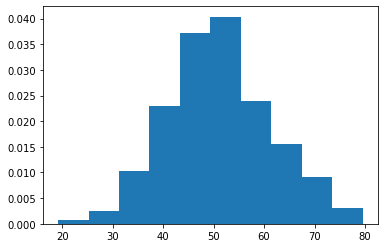

In [50]:
fig,ax = plt.subplots()
ax.hist(data.loc[pd.isna(data['rsi'])==False,'rsi'],density= True)

+ It is a normal distribution

### ema_fast

In [51]:
data['ema_fast'].describe()

count    1019.000000
mean        0.767226
std         0.097358
min         0.598982
25%         0.680565
50%         0.789292
75%         0.859062
max         0.903959
Name: ema_fast, dtype: float64

+ There are some missing values in this variable

In [52]:
np.std(data['ema_fast'])/np.mean(data['ema_fast'])

0.1268345227551681

(array([3.70046562, 1.19058459, 5.920745  , 2.60641492, 1.48018625,
        1.09405071, 2.83166065, 2.60641492, 5.11629595, 6.24252462]),
 array([0.59898211, 0.62947982, 0.65997754, 0.69047525, 0.72097297,
        0.75147068, 0.78196839, 0.81246611, 0.84296382, 0.87346153,
        0.90395925]),
 <a list of 10 Patch objects>)

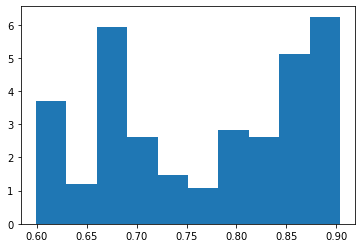

In [53]:
fig,ax = plt.subplots()
ax.hist(data.loc[pd.isna(data['ema_fast'])==False,'ema_fast'],density= True)

+ It is not a normal distribution
+ It is simetric

### ema_slow

In [54]:
data['ema_slow'].describe()

count    991.000000
mean       0.767803
std        0.093470
min        0.607234
25%        0.682333
50%        0.785421
75%        0.856231
max        0.889572
Name: ema_slow, dtype: float64

+ There are some missing values in this variable

In [55]:
np.std(data['ema_slow'])/np.mean(data['ema_slow'])

0.1216751734118988

(array([4.18159225, 0.60758178, 8.47040481, 0.50036147, 1.71552502,
        1.92996565, 1.25090366, 3.18086932, 5.61119644, 7.97004334]),
 array([0.60723357, 0.63546745, 0.66370133, 0.6919352 , 0.72016908,
        0.74840296, 0.77663684, 0.80487071, 0.83310459, 0.86133847,
        0.88957235]),
 <a list of 10 Patch objects>)

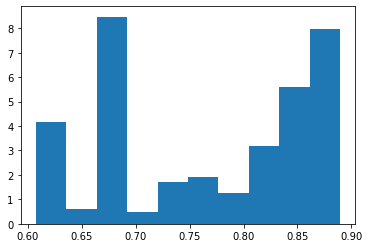

In [56]:
fig,ax = plt.subplots()
ax.hist(data.loc[pd.isna(data['ema_slow'])==False,'ema_slow'],density= True)

+ It is very similar the previous one.
+ ema_fast and ema_slow are similar


### volatility

In [57]:
data['volatility'].describe()

count    1018.000000
mean        2.130261
std         1.383115
min         1.006340
25%         1.466948
50%         1.835083
75%         2.231290
max        16.200247
Name: volatility, dtype: float64

+ There are some missing values in this variable

In [58]:
np.std(data['volatility'])/np.mean(data['volatility'])

0.6489512873215016

Volatility variable has a huge coefficient of variation (CV). I suppose it is normal because there some instances with a very high volatility and so the standard deviation is very big

(array([0.55342211, 0.07305689, 0.01486999, 0.00646521, 0.00387913,
        0.00193956, 0.00129304, 0.00129304, 0.00064652, 0.00129304]),
 array([ 1.00633973,  2.52573048,  4.04512124,  5.564512  ,  7.08390275,
         8.60329351, 10.12268426, 11.64207502, 13.16146577, 14.68085653,
        16.20024729]),
 <a list of 10 Patch objects>)

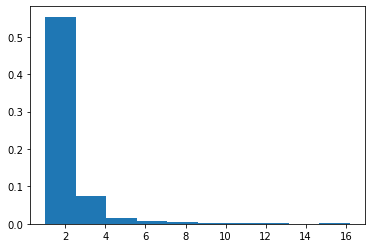

In [59]:
fig,ax = plt.subplots()
ax.hist(data.loc[pd.isna(data['volatility'])==False,'volatility'],density= True)

+ This distribution has a large tail on the right. It is not simetric

{'whiskers': [<matplotlib.lines.Line2D at 0x18c56647b00>,
 'caps': [<matplotlib.lines.Line2D at 0x18c56653240>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c566477f0>],
 'medians': [<matplotlib.lines.Line2D at 0x18c56653940>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c56653cc0>],
 'means': []}

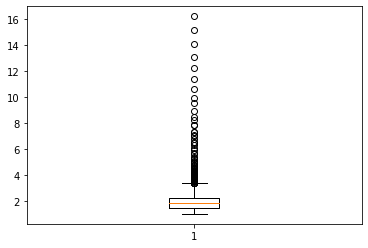

In [60]:
fig,ax = plt.subplots()
ax.boxplot(data.loc[pd.isna(data['volatility'])==False,'volatility'])

+ There are a lot of outliers in this variable
+ First we are going to study what would happen if we do a log transformation to this variable

In [61]:
log_volatility=np.log(data.loc[pd.isna(data['volatility'])==False,'volatility'])

(array([0.48078223, 1.13832263, 1.19135009, 0.43836027, 0.17322301,
        0.08130876, 0.03535163, 0.02828131, 0.01767582, 0.01414065]),
 array([0.00631972, 0.2841904 , 0.56206107, 0.83993175, 1.11780243,
        1.39567311, 1.67354379, 1.95141447, 2.22928515, 2.50715583,
        2.78502651]),
 <a list of 10 Patch objects>)

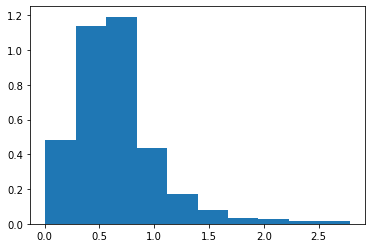

In [62]:
fig,ax = plt.subplots()
ax.hist(log_volatility,density= True)

{'whiskers': [<matplotlib.lines.Line2D at 0x18c561d9ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x18c562f9c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c561d9828>],
 'medians': [<matplotlib.lines.Line2D at 0x18c562969b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c562ae978>],
 'means': []}

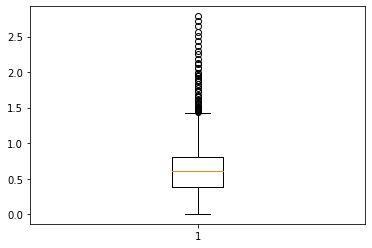

In [63]:
fig,ax = plt.subplots()
ax.boxplot(log_volatility)

+ With log transformation the volatility variable has a lot of outliers on the right
+ We are going to keep them without any change

# Multivariate analysis

Now we are going to analyze the relation between variables

In [64]:
continous_variables=data.columns[1:].tolist()

In [65]:
continous_variables

['Open', 'High', 'Low', 'Close', 'rsi', 'ema_fast', 'ema_slow', 'volatility']

In [66]:
corr_cont = data[continous_variables].corr()

In [67]:
corr_cont

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
Open,1.000000,0.997765,0.997915,0.995587,0.078943,0.991611,0.968013,-0.070292
High,0.997765,1.000000,0.997125,0.998045,0.101303,0.989377,0.963480,-0.064057
Low,0.997915,0.997125,1.000000,0.997929,0.089003,0.991786,0.969853,-0.077625
Close,0.995587,0.998045,0.997929,1.000000,0.111305,0.989230,0.964940,-0.069950
rsi,0.078943,0.101303,0.089003,0.111305,1.000000,-0.016902,-0.151344,0.213278
ema_fast,0.991611,0.989377,0.991786,0.989230,-0.016902,1.000000,0.988195,-0.090605
ema_slow,0.968013,0.963480,0.969853,0.964940,-0.151344,0.988195,1.000000,-0.122481
volatility,-0.070292,-0.064057,-0.077625,-0.069950,0.213278,-0.090605,-0.122481,1.000000


In [68]:
parms=rcParams['figure.figsize']

In [69]:
sns.set_style('whitegrid')
sns.set_context({'figure.figsize':(24,13)})
sns.set(rc={'axes.facecolor':'white','figure.facecolor':'white'})

Text(0.5, 1.0, 'Headmap for EURGBP dataset')

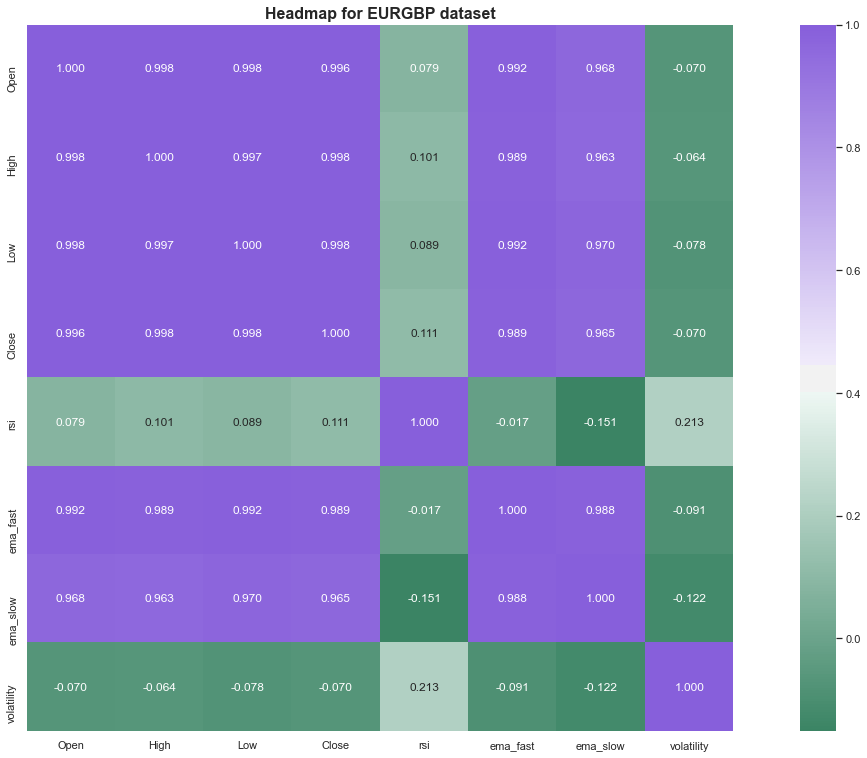

In [70]:
sns.heatmap(corr_cont,cmap=sns.diverging_palette(150,275,as_cmap = True),square = True, annot = True, fmt ='.3f')
plt.title('Headmap for EURGBP dataset',weight='bold',fontsize=16)

+ Open,High,Low and Close are highly correlated
+ ema_fast and ema_slow are also higly correlated
+ rsi and volatility are not correlated with any variable

In [71]:
rcParams['figure.figsize'] = parms

# Time evolution of the variables

In [72]:
data

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
0,2000-01-03,0.62810,0.63300,0.62350,0.62720,NaN,NaN,NaN,NaN
1,2000-01-10,0.62710,0.62900,0.61810,0.61970,NaN,NaN,NaN,NaN
2,2000-01-17,0.62000,0.62250,0.60720,0.60900,NaN,NaN,NaN,NaN
3,2000-01-24,0.60910,0.61271,0.59900,0.60270,NaN,NaN,NaN,NaN
4,2000-01-31,0.60210,0.62670,0.59800,0.61580,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1030,2019-09-30,0.89002,0.89365,0.88333,0.88779,47.151897,0.895761,0.889108,1.564625
1031,2019-10-07,0.89050,0.90183,0.86835,0.86835,37.551961,0.892106,0.888143,1.760791
1032,2019-10-14,0.87443,0.88081,0.85808,0.86451,35.993098,0.888426,0.887044,1.830085
1033,2019-10-21,0.86453,0.86687,0.85770,0.86380,35.698024,0.885143,0.885962,1.776589


In [73]:
[df.loc[df['month_int'==m,'month'] for m in df['month'].tolist()]

SyntaxError: invalid syntax (<ipython-input-73-5898c7c0fda2>, line 1)

In [ ]:
def temporal_evolution(variable):

    df_temp=data.loc[:,('Date',variable)]
    df_temp =df_temp.loc[pd.isna(data[variable])==False]
    df_temp.loc[:,'month']=df_temp.apply(lambda row: str(row['Date'].year)+str(row['Date'].month).zfill(2),axis =1)
    df_temp=df_temp.groupby('month')[variable].agg(['mean'])
    df_temp.reset_index(level=0,inplace =True)
    df_temp.loc[:,'month_int']=df_temp.apply(lambda row:(int(row['month'][0:4])%2000)*12+int(row['month'][4:6]),axis=1)
    df_temp.loc[:,'month']=df_temp.apply(lambda row: row['month'][4:6]+'/'+row['month'][0:4],axis=1)
    fig,ax = plt.subplots()
    ax.scatter(df_temp['month_int'],df_temp['mean'])
    ax.set_xlabel('Months')
    ax.set_ylabel('Mean of '+ variable)

    m,b = np.polyfit(df_temp['month_int'],df_temp['mean'],1)
    plt.plot(df_temp['month_int'],m*df_temp['month_int']+b)

In [ ]:
temporal_evolution('Open')

In [ ]:
temporal_evolution('High')

In [ ]:
temporal_evolution('Low')

In [ ]:
temporal_evolution('Close')

+ We can see the hight volatility of these temporal series
+ They grow up 

In [ ]:
temporal_evolution('rsi')

+ rsi does not increase or decrease over time

In [ ]:
temporal_evolution('ema_fast')

In [ ]:
temporal_evolution('ema_slow')

In [ ]:
temporal_evolution('volatility')

+ There are volatility peaks that then gradually return to average volatility